In [228]:
import numpy as np
import pandas as pd
import pathlib as p
import seaborn as sns

In [229]:
%matplotlib inline

In [230]:
data_dir = r"C:\work\dev\dECMT_src\data_all\COVID19_Data\Current"



In [231]:
comorbidFN = p.Path(data_dir) / "REACT_Comorbidities_unpivoted.csv"
demogFN = p.Path(data_dir) / "REACT_Demographics.csv"

In [232]:
comorbidDF:pd.DataFrame = pd.read_csv(comorbidFN)
demogDF:pd.DataFrame = pd.read_csv(demogFN)


In [233]:
comorbidDF.head()

,STUDY_ID,COMORBIDITY,STATUS
0,UHSCOVID_00989a42,COPD,1
1,UHSCOVID_0520de1c,COPD,1
2,UHSCOVID_0744a86c,COPD,1
3,UHSCOVID_0874d194,COPD,1
4,UHSCOVID_0b401459,COPD,1


In [234]:
demogDF.head()

,STUDY_ID,PATIENT_AGE,DOB,DATE_OF_DEATH,DOD_DATE,GENDER,ETHNIC_GROUP,SMOKING_HISTORY,POSTCODE,IS_PREGNANT,...,ADM_TIME_R,DISCHARGEDATE,DISCHARGE_DATE_R,DISCHARGE_TIME_R,LOS,LOS_PREPOS,READM28,READM_DATETIME,READM_DATE,READM_TIME
0,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,17:19:00,2020-04-02 10:21:00,02/04/2020,10:21:00,6.71,-0.10,N,NaN,NaN,NaN
1,UHSCOVID_00ac1e32,73.0,10/1946,NaN,NaN,2,A,Ex-smoker|NR,SO21,0,...,18:00:00,2020-05-19 12:56:00,19/05/2020,12:56:00,41.79,4.00,N,NaN,NaN,NaN
2,UHSCOVID_00cb7bdd,76.0,03/1944,2020-04-13 00:00:00,13/04/2020,1,A,NR|NR,SO16,0,...,17:56:00,2020-04-13 02:15:00,13/04/2020,02:15:00,2.35,-0.04,N,NaN,NaN,NaN
3,UHSCOVID_01add35c,67.0,10/1952,2020-05-27 00:00:00,27/05/2020,1,A,NR|NR,SO19,0,...,10:17:00,2020-05-23 18:15:00,23/05/2020,18:15:00,1.33,0.21,Y,2020-05-26 09:41:00,26/05/2020,09:41:00
4,UHSCOVID_01f7838d,97.0,01/1923,NaN,NaN,2,A,NR|NR,SO16,0,...,09:00:00,2020-05-17 16:00:00,17/05/2020,16:00:00,13.29,7.13,N,NaN,NaN,NaN


In [235]:
comorbidDF.columns

Index(['STUDY_ID', 'COMORBIDITY', 'STATUS'], dtype='object')

In [236]:
comorbidDF['COMORBIDITY'].unique()


array(['COPD', 'ASTHMA', 'ILD', 'HYPERTENSION', 'THROMBOEMBOLIC',
       'CARDIAC_D', 'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR',
       'MAGLINANT_NEO', 'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D',
       'DIMENTIA', 'IMMUNO'], dtype=object)

In [237]:
dfRes:pd.DataFrame = pd.merge(demogDF, comorbidDF, on='STUDY_ID', how='inner')

In [238]:
dfRes.head()

,STUDY_ID,PATIENT_AGE,DOB,DATE_OF_DEATH,DOD_DATE,GENDER,ETHNIC_GROUP,SMOKING_HISTORY,POSTCODE,IS_PREGNANT,...,DISCHARGE_DATE_R,DISCHARGE_TIME_R,LOS,LOS_PREPOS,READM28,READM_DATETIME,READM_DATE,READM_TIME,COMORBIDITY,STATUS
0,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,02/04/2020,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,COPD,1
1,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,02/04/2020,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,ASTHMA,1
2,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,02/04/2020,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,DIABETES,1
3,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,02/04/2020,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,OBESITY,1
4,UHSCOVID_00ac1e32,73.0,10/1946,NaN,NaN,2,A,Ex-smoker|NR,SO21,0,...,19/05/2020,12:56:00,41.79,4.0,N,NaN,NaN,NaN,HYPERTENSION,1


In [239]:
len(dfRes)

1628

In [240]:
dfRes.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME', 'COMORBIDITY', 'STATUS'],
      dtype='object')

In [241]:
dfRes['RENAL_D_PRESENT'] = (dfRes['COMORBIDITY'] == 'RENAL_D')
dfRes[dfRes['RENAL_D_PRESENT']].head()

,STUDY_ID,PATIENT_AGE,DOB,DATE_OF_DEATH,DOD_DATE,GENDER,ETHNIC_GROUP,SMOKING_HISTORY,POSTCODE,IS_PREGNANT,...,DISCHARGE_TIME_R,LOS,LOS_PREPOS,READM28,READM_DATETIME,READM_DATE,READM_TIME,COMORBIDITY,STATUS,RENAL_D_PRESENT
13,UHSCOVID_01f7838d,97.0,01/1923,NaN,NaN,2,A,NR|NR,SO16,0,...,16:00:00,13.29,7.13,N,NaN,NaN,NaN,RENAL_D,1,True
20,UHSCOVID_03e583e8,75.0,04/1944,NaN,NaN,2,A,Never smoked|NR,SO41,0,...,16:11:00,7.97,-0.07,N,NaN,NaN,NaN,RENAL_D,1,True
26,UHSCOVID_04924369,74.0,06/1945,NaN,NaN,1,X,NR|NR,SO31,0,...,20:30:00,9.50,-0.05,N,NaN,NaN,NaN,RENAL_D,1,True
32,UHSCOVID_0520de1c,79.0,03/1941,NaN,NaN,1,A,Ex-smoker|NR,SO40,0,...,16:37:00,6.75,-0.36,N,NaN,NaN,NaN,RENAL_D,1,True
38,UHSCOVID_05801ffc,83.0,09/1936,2020-04-24 00:00:00,24/04/2020,1,A,Ex-smoker|NR,SO30,0,...,18:41:00,19.13,-0.12,N,NaN,NaN,NaN,RENAL_D,1,True


In [242]:
comordCol = 'GENDER'
label_freq = dfRes.groupby([comordCol,'RENAL_D_PRESENT']).size().reset_index(name='COUNTS') #[['RENAL_D_PRESENT','GENDER']].value_countscounts()
label_freq


,GENDER,RENAL_D_PRESENT,COUNTS
0,1,False,652
1,1,True,87
2,2,False,810
3,2,True,79


In [243]:
label_freq['Fraction'] = label_freq['COUNTS']/ label_freq['COUNTS'].sum()
label_freq

,GENDER,RENAL_D_PRESENT,COUNTS,Fraction
0,1,False,652,0.400491
1,1,True,87,0.053440
2,2,False,810,0.497543
3,2,True,79,0.048526


In [244]:
gendUniqVals = label_freq['GENDER'].unique()
gendUniqVals

array([1, 2], dtype=int64)

In [245]:
tmp = pd.get_dummies(label_freq['GENDER'])
tmp

,1,2
0,1,0
1,1,0
2,0,1
3,0,1


In [246]:
tmp2 = pd.concat([label_freq,tmp], axis = 1)
tmp2




,GENDER,RENAL_D_PRESENT,COUNTS,Fraction,1,2
0,1,False,652,0.400491,1,0
1,1,True,87,0.053440,1,0
2,2,False,810,0.497543,0,1
3,2,True,79,0.048526,0,1


In [247]:
tmp3 = pd.merge(label_freq,tmp,left_index=True,right_index=True,how='inner')
tmp3

,GENDER,RENAL_D_PRESENT,COUNTS,Fraction,1,2
0,1,False,652,0.400491,1,0
1,1,True,87,0.053440,1,0
2,2,False,810,0.497543,0,1
3,2,True,79,0.048526,0,1


In [248]:
label_freq.head()

,GENDER,RENAL_D_PRESENT,COUNTS,Fraction
0,1,False,652,0.400491
1,1,True,87,0.053440
2,2,False,810,0.497543
3,2,True,79,0.048526


In [249]:
label_freq.columns

Index(['GENDER', 'RENAL_D_PRESENT', 'COUNTS', 'Fraction'], dtype='object')

In [250]:
label_freq.set_index('RENAL_D_PRESENT',inplace=True)

In [251]:
p = label_freq.pivot(columns='GENDER', values='Fraction')
p

GENDER,1,2
RENAL_D_PRESENT,,
False,0.400491,0.497543
True,0.053440,0.048526


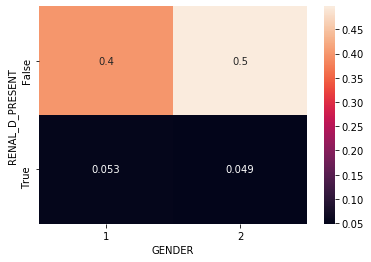

In [252]:

sns.heatmap(p, annot=True)